# What is the average birth weight of babies in the United States?

### Using data from National Survey of Family Growth (NSFG) from the National Center for Health Statistics
https://www.cdc.gov/nchs/nsfg/nsfg_2017_2019_puf.htm  
![nsfg_homepage](images/NSFG_homepage.jpg)


Data downloaded from AllenDowney/ThinkStats2 Github:  
https://github.com/AllenDowney/ThinkStats2/tree/master/homeworks

The Codebook with column explanations was downloaded here:  
https://www.cdc.gov/nchs/data/nsfg/2013-2015_NSFG_FemPregFile_Codebook.pdf

## Import the data and put into a dataframe

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data into a pandas dataframe
nsfg = pd.read_hdf('data/nsfg.hdf5', 'nsfg')

In [3]:
type(nsfg)

pandas.core.frame.DataFrame

### First thing to do is read the documentation to understand the meaning of the data you are working with

#### Using the Codebook (download link above) we examine one of the variables
![birthwgt_oz1](images/birthwgt_oz1.jpg)  


### Next, take a first look at what we are dealing with using:
```pandas
nsfg.shape
nsfg.columns
nsfg.head()
```

In [4]:
# Display the number of rows and columns
nsfg.shape

(9358, 10)

In [5]:
# Display the names of the columns
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [7]:
# Review the date types and look for missing values using .info() method
nsfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9358 entries, 0 to 9357
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   caseid        9358 non-null   int64  
 1   outcome       9358 non-null   int64  
 2   birthwgt_lb1  6485 non-null   float64
 3   birthwgt_oz1  6391 non-null   float64
 4   prglngth      9358 non-null   int64  
 5   nbrnaliv      6485 non-null   float64
 6   agecon        9358 non-null   int64  
 7   agepreg       9109 non-null   float64
 8   hpagelb       6485 non-null   float64
 9   wgt2013_2015  9358 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 804.2 KB


In [6]:
# Display the first 5 (default) rows of the dataframe with column names
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


# <span style="color:blue">Check and validate each column to prepare for data analysis</span>

Process for each column is as follows:
- [x] Review data distribution by using <span style="color:blue">.value_counts()</span>  method
- [x] Review Codebook listing of values and distributions and compare
- [x] Change datatype if necessary (categorical, datetime, int, float etc.)
- [x] Look at the summary statistics of a column using <span style="color:blue">.describe()</span> method
- [x] Plot histogram to visualize results using <span style="color:blue">matplotlib or seaborn</span>
- [x] Replace 'missing' values or 'bad' values with NaN using <span style="color:blue">.replace()</span>  method
- [x] Plot histogram to review results using <span style="color:blue">matplotlib or seaborn</span>

Columns to be examined:
1. [outcome](#outcome-validate)
2. [birthwgt_lb1](#birthwgt_lb1-validate)
3. [birthwgt_oz1](#birthwgt_oz1-validate)
4. [prglngth](#prglngth-validate)
5. [nbrnaliv](#nbrnaliv-validate)
6. [agecon](#agecon-validate)
7. [agepreg](#agepreg-validate)
8. [hpagelb](#hpagelb-validate)
9. [wgt2013-2015](#wgt2013-2015)

<a id="outcome-validate"></a>

## 'outcome' column examination

In [8]:
# Validate 'outcome' column data using .value_counts() and .sort_index() to order index
nsfg['outcome'].value_counts().sort_index()

1    6489
2     947
3      86
4    1469
5     118
6     249
Name: outcome, dtype: int64

### Validate results by comparing to the codebook 
The codebook lists the values and their frequencies
![outcome](images/outcome.jpg)  


From the Codebook we see that the datatype should be categorical but it is encoded as an 'int'

In [9]:
nsfg['outcome'] = nsfg['outcome'].astype('category')

In [10]:
nsfg['outcome'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6], ordered=False)

In [11]:
# Look at the summary statistics of a column using .describe() method
nsfg['outcome'].describe()

count     9358
unique       6
top          1
freq      6489
Name: outcome, dtype: int64

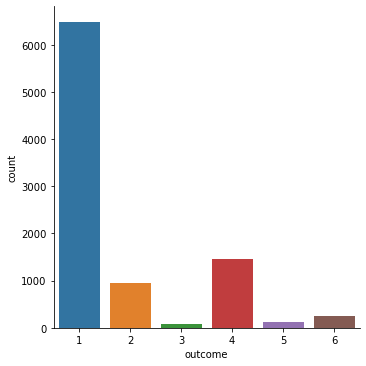

In [12]:
# Using Seaborn to plot a histogram to visuall examine distribution
sns.catplot(data=nsfg,x='outcome',kind='count')

These results don't appear to have 'missing data', so no replace is necessary

<a id="birthwgt_lb1-validate"></a>

## 'birthwgt_lb1' column examination

In [13]:
# Validate pounds(birthwgt_lb1) data using .value_counts() and .sort_index() to order index
nsfg['birthwgt_lb1'].value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

### Validate results by comparing to the codebook 
The codebook lists the values and their frequencies
![birthwgt_lb1](images/birthwgt_lb1.jpg)  


The datatype appears to be correct as an int64.  
The results agree with the codebook so we have some confidence we are reading and interpreting the data correctly

In [14]:
# Look at the summary statistics of a column using .describe() method
nsfg['birthwgt_lb1'].describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

<AxesSubplot:xlabel='birthwgt_lb1', ylabel='Count'>

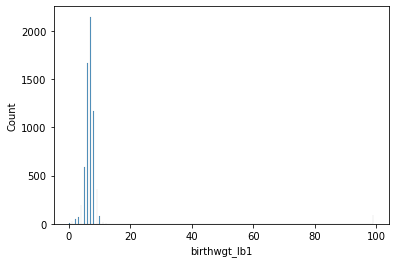

In [15]:
# Using Seaborn to plot a histogram to visuall examine distribution
sns.histplot(nsfg,x='birthwgt_lb1')

These results are including the 'missing data' values of 98 and 99 which are highly skewing the data
In order to get a meaningful statistical summary we need to replace those values with 'NaN'

In [16]:
# Replace the 'missing data' values of 98 and 99 with 'NaN'
nsfg['birthwgt_lb1'].replace([98,99], np.nan, inplace=True)

In [17]:
# Now look at the summary statistics and see how the mean has changed!
nsfg['birthwgt_lb1'].describe()

count    6390.000000
mean        6.703286
std         1.429265
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        17.000000
Name: birthwgt_lb1, dtype: float64

The mean has shifted from 8.06 lbs to 6.7 lbs by removing ninety-four 99lb babies!

<AxesSubplot:xlabel='birthwgt_lb1', ylabel='Count'>

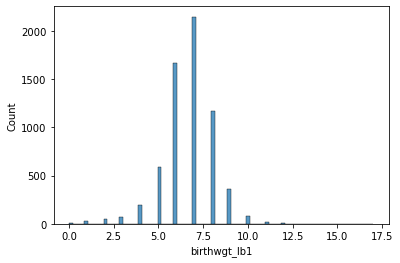

In [18]:
# Using Seaborn to plot a histogram to visuall examine distribution
sns.histplot(nsfg,x='birthwgt_lb1')

<a id="birthwgt_oz1-validate"></a>

### birthwgt_oz1 column examination

In [19]:
# Validate pounds(birthwgt_oz1) data using .value_counts() and .sort_index() to order index
nsfg['birthwgt_oz1'].value_counts().sort_index()

0.0     757
1.0     297
2.0     429
3.0     393
4.0     386
5.0     407
6.0     543
7.0     346
8.0     518
9.0     377
10.0    295
11.0    418
12.0    388
13.0    275
14.0    258
15.0    268
98.0      1
99.0     35
Name: birthwgt_oz1, dtype: int64

### Validate results by comparing to the codebook 
The codebook lists the values and their frequencies
![birthwgt_oz1](images/birthwgt_oz1.jpg)  


The datatype appears to be correct as an int64.  
The results agree with the codebook so we have some confidence we are reading and interpreting the data correctly

In [20]:
# Look at the summary statistics of a column using .describe() method
nsfg['birthwgt_oz1'].describe()

count    6391.000000
mean        7.213895
std         8.254885
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        99.000000
Name: birthwgt_oz1, dtype: float64

<AxesSubplot:xlabel='birthwgt_oz1', ylabel='Count'>

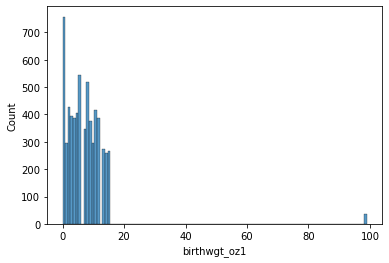

In [21]:
# Using Seaborn to plot a histogram to visuall examine distribution
sns.histplot(nsfg,x='birthwgt_oz1')

These results are including the 'missing data' values of 98 and 99 which are highly skewing the data
In order to get a meaningful statistical summary we need to replace those values with 'NaN'

In [22]:
# Replace the 'missing data' values of 98 and 99 with 'NaN'
nsfg['birthwgt_oz1'].replace([98,99], np.nan, inplace=True)

In [23]:
# Now look at the summary statistics and see how the mean has changed!
nsfg['birthwgt_oz1'].describe()

count    6355.000000
mean        6.694099
std         4.533847
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        15.000000
Name: birthwgt_oz1, dtype: float64

The mean has shifted from 7.21 to 6.7 ozs by removing thirty-five 990z babies!

In [25]:
# Validate pounds(birthwgt_oz1) data using .value_counts() and .sort_index() to order index
nsfg['birthwgt_oz1'].value_counts().sort_index()

0.0     757
1.0     297
2.0     429
3.0     393
4.0     386
5.0     407
6.0     543
7.0     346
8.0     518
9.0     377
10.0    295
11.0    418
12.0    388
13.0    275
14.0    258
15.0    268
Name: birthwgt_oz1, dtype: int64

<AxesSubplot:xlabel='birthwgt_oz1', ylabel='Count'>

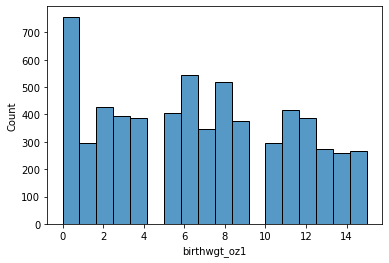

In [24]:
# Using Seaborn to plot a histogram to visuall examine distribution
sns.histplot(nsfg,x='birthwgt_oz1')

Not sure why the plot appears to have gaps (maybe the tick marks are off?)

<a id="prglngth-validate"></a>

### 'prglngth' column examination

In [26]:
# Validate pounds(prglngth) data using .value_counts() and .sort_index() to order index
nsfg['prglngth'].value_counts().sort_index()

0        7
1       11
2       50
3      102
4      274
5      128
6      375
7      185
8      299
9      331
10     125
11      82
12     132
13     222
14      39
15      27
16      40
17      85
18      25
19      25
20      21
21       9
22      76
23       7
24      25
25      13
26      58
27      17
28      39
29      25
30      95
31      15
32     118
33      35
34      73
35     239
36     313
37     432
38     755
39    2384
40    1311
41     422
42     231
43      65
44       9
45       3
46       3
48       1
Name: prglngth, dtype: int64

### Validate results by comparing to the codebook 
The codebook lists the values and their frequencies
![prglngth](images/prglngth.jpg)  


The datatype appears to be correct as an int64.  
The results agree with the codebook so we have some confidence we are reading and interpreting the data correctly

In [27]:
# Look at the summary statistics of a column using .describe() method
nsfg['prglngth'].describe()

count    9358.000000
mean       29.896345
std        13.685389
min         0.000000
25%        14.000000
50%        38.000000
75%        39.000000
max        48.000000
Name: prglngth, dtype: float64

<AxesSubplot:xlabel='prglngth', ylabel='Count'>

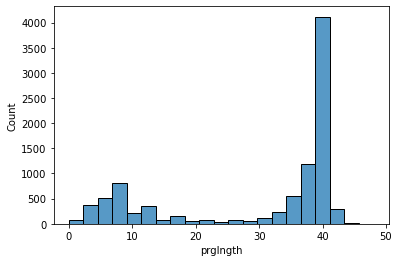

In [28]:
# Using Seaborn to plot a histogram to visuall examine distribution
sns.histplot(nsfg,x='prglngth')

These results don't appear to have 'missing data' and the datatype makes sense as an 'int' so no replace those values with 'NaN'

<a id="nbrnaliv-validate"></a>

### 'nbrnaliv' column examination

In [29]:
# Validate pounds(nbrnaliv) data using .value_counts() and .sort_index() to order index
nsfg['nbrnaliv'].value_counts().sort_index()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

### Validate results by comparing to the codebook 
The codebook lists the values and their frequencies
![nbrnaliv](images/nbrnaliv.jpg)  


From the Codebook we see that the datatype should be categorical but it is encoded as an 'int'

In [34]:
nsfg['nbrnaliv'] = nsfg['nbrnaliv'].astype('category')

In [35]:
nsfg['nbrnaliv'].dtype

CategoricalDtype(categories=[1.0, 2.0, 3.0], ordered=False)

In [36]:
# Look at the summary statistics of a column using .describe() method
nsfg['nbrnaliv'].describe()

count     6484.0
unique       3.0
top          1.0
freq      6379.0
Name: nbrnaliv, dtype: float64

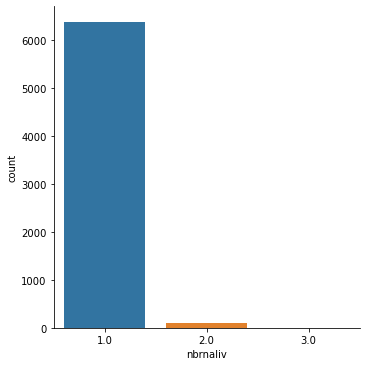

In [37]:
# Using Seaborn to plot a histogram to visuall examine distribution
sns.catplot(data=nsfg,x='nbrnaliv',kind='count')

<a id="agecon-validate"></a>

### agecon column examination

In [40]:
# Validate pounds(agecon) data using .value_counts() and .sort_index() to order index
nsfg['agecon'].value_counts().sort_index()

750     1
833     1
925     1
950     1
1066    1
       ..
4266    2
4291    3
4325    1
4333    1
4350    1
Name: agecon, Length: 368, dtype: int64

### Validate results by comparing to the codebook 
The codebook lists the values and their frequencies
![agecon](images/agecon.jpg)  


The datatype appears to be correct as an int64, but the data would much more useful if it demarked the years by adding a decimal two digits in so 2000 would become 20.00 years 
The results agree with the codebook so we have some confidence we are reading and interpreting the data correctly

In [43]:
# transform the 4 digit age code into a two digit age with a decimal portion of the portion of the next year
nsfg['agecon'] = nsfg['agecon'] / 100.0

In [44]:
# Look at the summary statistics of a column using .describe() method
nsfg['agecon'].describe()

count    9358.000000
mean       24.463302
std         5.793924
min         7.500000
25%        19.830000
50%        23.660000
75%        28.500000
max        43.500000
Name: agecon, dtype: float64

<AxesSubplot:xlabel='agecon', ylabel='Count'>

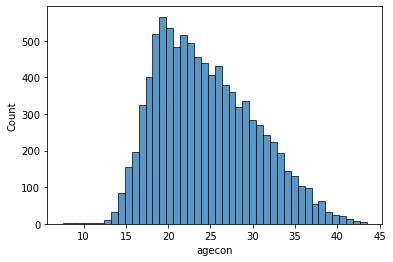

In [45]:
# Using Seaborn to plot a histogram to visuall examine distribution
sns.histplot(nsfg,x='agecon')

These results don't appear to have missing data so no replace is necessary

In [47]:
# Validate pounds(agecon) data using .value_counts() and .sort_index() to order index
nsfg['agecon'].dtype

dtype('float64')

<a id="agepreg-validate"></a>

## 'agepreg' column examination

In [48]:
# Validate pounds(agepreg) data using .value_counts() and .sort_index() to order index
nsfg['agepreg'].value_counts().sort_index()

825.0     1
908.0     1
958.0     1
1025.0    1
1075.0    1
         ..
4291.0    1
4300.0    1
4325.0    1
4341.0    1
4350.0    1
Name: agepreg, Length: 370, dtype: int64

### Validate results by comparing to the codebook 
The codebook lists the values and their frequencies
![agepreg](images/agepreg.jpg)  


The datatype appears to be correct as an int64, but the data would much more useful if it demarked the years by adding a decimal two digits in so 2000 would become 20.00 years 
The results agree with the codebook so we have some confidence we are reading and interpreting the data correctly

In [49]:
# transform the 4 digit age code into a two digit age with a decimal portion of the portion of the next year
nsfg['agepreg'] = nsfg['agepreg'] / 100.0

In [50]:
# Look at the summary statistics of a column using .describe() method
nsfg['agepreg'].describe()

count    9109.000000
mean       24.949346
std         5.780992
min         8.250000
25%        20.410000
50%        24.160000
75%        29.000000
max        43.500000
Name: agepreg, dtype: float64

<AxesSubplot:xlabel='agepreg', ylabel='Count'>

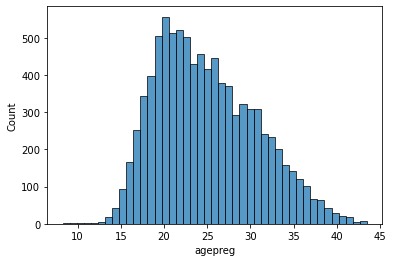

In [51]:
# Using Seaborn to plot a histogram to visuall examine distribution
sns.histplot(nsfg,x='agepreg')

These results don't appear to have missing data so no replace is necessary

<a id="hpagelb-validate"></a>

## 'hpagelb' column examination

In [55]:
# Validate pounds(hpagelb) data using .value_counts() and .sort_index() to order index
nsfg['hpagelb'].value_counts().sort_index()

5.0       1
8.0       1
12.0      1
13.0      3
14.0      1
15.0     15
16.0     45
17.0    103
18.0    185
19.0    242
20.0    261
21.0    323
22.0    332
23.0    353
24.0    364
25.0    412
26.0    324
27.0    341
28.0    355
29.0    316
30.0    304
31.0    256
32.0    255
33.0    209
34.0    211
35.0    183
36.0    154
37.0    135
38.0    140
39.0     86
40.0    103
41.0     70
42.0     64
43.0     47
44.0     38
45.0     57
46.0     31
47.0     10
48.0     17
49.0     20
50.0      7
51.0      9
52.0      7
53.0      4
54.0      1
55.0      7
57.0      3
58.0      1
59.0      1
60.0      3
65.0      1
98.0      2
99.0     71
Name: hpagelb, dtype: int64

### Validate results by comparing to the codebook 
The codebook lists the values and their frequencies
![hpagelb](images/hpagelb.jpg)  
![hpagelb2](images/hpagelb2.jpg)

The datatype appears to be correct as an int64, but it appears that there are 'missing values' coded as '98' (Refused) and '99' (Don't know). These need to be replaced with NaN

In [58]:
# Replace the 'missing data' values of 98 and 99 with 'NaN'
nsfg['hpagelb'].replace([98,99], np.nan, inplace=True)

In [59]:
# Now look at the summary statistics and see how the mean has changed!
nsfg['hpagelb'].describe()

count    6412.000000
mean       28.195415
std         7.232034
min         5.000000
25%        23.000000
50%        27.000000
75%        33.000000
max        65.000000
Name: hpagelb, dtype: float64

In [60]:
# Validate pounds(hpagelb) data using .value_counts() and .sort_index() to order index
nsfg['hpagelb'].value_counts().sort_index()

5.0       1
8.0       1
12.0      1
13.0      3
14.0      1
15.0     15
16.0     45
17.0    103
18.0    185
19.0    242
20.0    261
21.0    323
22.0    332
23.0    353
24.0    364
25.0    412
26.0    324
27.0    341
28.0    355
29.0    316
30.0    304
31.0    256
32.0    255
33.0    209
34.0    211
35.0    183
36.0    154
37.0    135
38.0    140
39.0     86
40.0    103
41.0     70
42.0     64
43.0     47
44.0     38
45.0     57
46.0     31
47.0     10
48.0     17
49.0     20
50.0      7
51.0      9
52.0      7
53.0      4
54.0      1
55.0      7
57.0      3
58.0      1
59.0      1
60.0      3
65.0      1
Name: hpagelb, dtype: int64

<AxesSubplot:xlabel='hpagelb', ylabel='Count'>

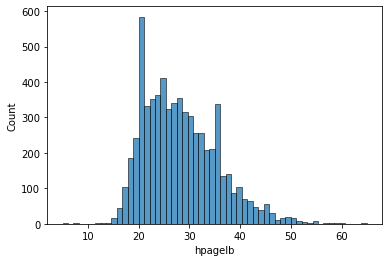

In [61]:
# Using Seaborn to plot a histogram to visuall examine distribution
sns.histplot(nsfg,x='hpagelb')

<a id="wgt2013_2015"></a>

## 'wgt2013_2015' column examination

In [62]:
# Validate pounds(wgt2013_2015) data using .value_counts() and .sort_index() to order index
nsfg['wgt2013_2015'].value_counts().sort_index()

1859.105000     158
1878.981422       2
1882.961275       3
1887.764078       4
1889.828073       9
               ... 
73603.606662      1
73806.673219      2
75042.552798      4
75340.755558      3
75399.410000     86
Name: wgt2013_2015, Length: 3299, dtype: int64

### Validate results by comparing to the codebook 
The codebook lists the values and their frequencies
![wgt2013_2015](images/wgt2013_2015.jpg)  


The results agree with the codebook so we have some confidence we are reading and interpreting the data correctly

In [63]:
# Look at the summary statistics of a column using .describe() method
nsfg['wgt2013_2015'].describe()

count     9358.000000
mean     10759.200147
std      11400.179222
min       1859.105000
25%       4340.053407
50%       7062.994158
75%      12629.322982
max      75399.410000
Name: wgt2013_2015, dtype: float64

<AxesSubplot:xlabel='wgt2013_2015', ylabel='Count'>

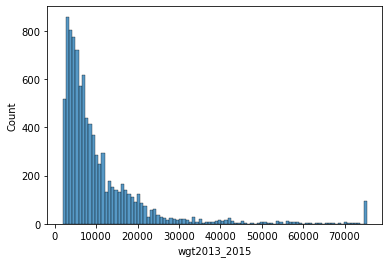

In [64]:
# Using Seaborn to plot a histogram to visuall examine distribution
sns.histplot(nsfg,x='wgt2013_2015')

These results are confusing at best. What are these units? They can't be lbs, maybe ozs? We will leave this column as is.

# Recode - Generate additional column data from existing columns

## First add the lb and oz columns together to get a 'total weight' column

In [71]:
# Add the birthwgt_lb1 in lbs to the birthwgt_oz1 / 16 (to get it in lbs) to create 'birth_weight' column
nsfg['birth_weight'] = nsfg['birthwgt_lb1'] + nsfg['birthwgt_oz1'] / 16.0

In [72]:
#Subtract the age of conception from age of pregnancy to get pregnancy length - store in new column 'preg_length'
nsfg['preg_length'] = nsfg['agepreg'] - nsfg['agecon']

In [74]:
# Multiply the preg_length column by 52 to restate it in weeks to compare to prglngth column to cross validate
# Store it in a new column called 'preg_length_wks'
nsfg['preg_length_wks'] = nsfg['preg_length'] * 52

In [75]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015,birth_weight,preg_length,preg_length_wks
0,60418,1,5.0,4.0,40,1.0,20.00,20.75,22.0,3554.964843,5.2500,0.75,39.00
1,60418,1,4.0,12.0,36,1.0,22.91,23.58,25.0,3554.964843,4.7500,0.67,34.84
2,60418,1,5.0,4.0,36,1.0,32.41,33.08,52.0,3554.964843,5.2500,0.67,34.84
3,60419,6,NaN,NaN,33,NaN,36.50,NaN,NaN,2484.535358,NaN,NaN,NaN
4,60420,1,8.0,13.0,41,1.0,21.91,22.66,24.0,2903.782914,8.8125,0.75,39.00


# Filter and Visualize

<AxesSubplot:xlabel='birth_weight', ylabel='Count'>

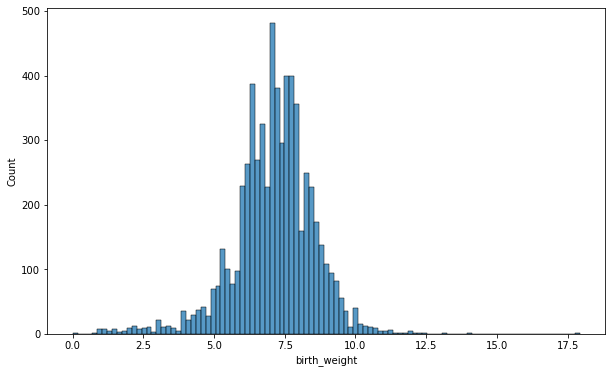

In [77]:
# Set figsize to view it large
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(nsfg, x='birth_weight')

The distribution looks a little like a normal distribution, but skewed to the left
This is most likely due to the fact that we are including pre-term babies which would have low weights
The most common term for pregnancy is 39 weeks - which is full-term
"Pre-term" is usually defined to be less than 37 weeks

In [79]:
# Create a Boolean Series (or mask) selecting for all prglngth values less than 37
preterm = nsfg['prglngth'] < 37

In [80]:
# Using the sum() of the preterm series will give us the number of "True" or Pre-term babies
preterm.sum()

3742

In [81]:
# The mean() of the preterm series will tell us the fraction of "True" or Pre-term babies of the total
preterm.mean()

0.39987176747168196

In [166]:
# Filtering using preterm against the nsfg dataframe column we can get the average stats for each column of pre-term babies
nsfg[preterm].mean()

caseid             65525.355425
birthwgt_lb1           5.173572
birthwgt_oz1           6.544944
prglngth              15.810796
agecon                24.487571
agepreg               24.588078
hpagelb               28.140782
wgt2013_2015       10441.179532
birth_weight           5.577598
preg_length            0.264003
preg_length_wks       13.728178
dtype: float64

In [167]:
# Or we could just do this for the series
preterm_weight = nsfg[preterm]['birth_weight']

In [168]:
preterm_weight.mean()

5.577598314606742

In [184]:
full_term = nsfg['prglngth'] >= 37

### We also need to account for multiple births skewing our data in the other direction from preterm

### Validate results by comparing to the codebook 
The codebook lists the values and their frequencies
![nbrnaliv](images/nbrnaliv.jpg)  


From the Codebook we see that values of 2 or 3 are multiple births - which will skew our data in the positive direction
These values need to be removed using a boolean mask

In [185]:
# Filter Single births
single = nsfg['nbrnaliv'] == 1

In [186]:
# Compute birth weight for single full-term babies
single_full_term_weight = nsfg[full_term & single]['birth_weight']
print('Single full-term mean:', single_full_term_weight.mean())

Single full-term mean: 7.385643450184502


In [187]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015,birth_weight,preg_length,preg_length_wks
0,60418,1,5.0,4.0,40,1.0,20.00,20.75,22.0,3554.964843,5.2500,0.75,39.00
1,60418,1,4.0,12.0,36,1.0,22.91,23.58,25.0,3554.964843,4.7500,0.67,34.84
2,60418,1,5.0,4.0,36,1.0,32.41,33.08,52.0,3554.964843,5.2500,0.67,34.84
3,60419,6,NaN,NaN,33,NaN,36.50,NaN,NaN,2484.535358,NaN,NaN,NaN
4,60420,1,8.0,13.0,41,1.0,21.91,22.66,24.0,2903.782914,8.8125,0.75,39.00


# Extra fun

In [188]:
#Create a column with values "PreTerm" and "FullTerm" for plotting using hue
term_bin = [0, 37, np.inf]
term_names = ['PreTerm','FullTerm']

nsfg['term'] = pd.cut(nsfg['prglngth'], term_bin, labels=term_names)

<AxesSubplot:xlabel='birth_weight', ylabel='Count'>

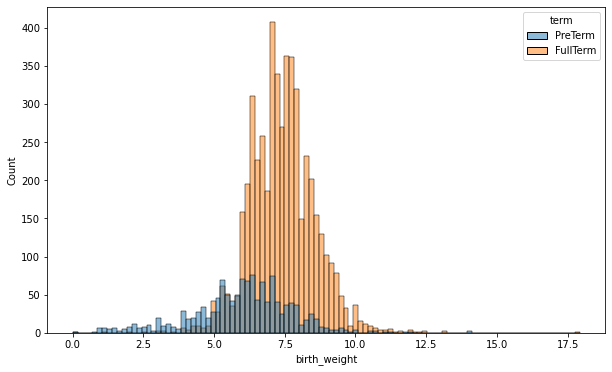

In [192]:
# Using the new column let's plot the histogram again with hue=term
# Set figsize to view it large
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(nsfg, x='birth_weight', hue='term')

In [193]:
#Create a column with values "1 Baby" , "2 Babies", "3 Plus Babies" for plotting using hue
baby_bin = [0, 1, 2, 3]
baby_names = ["1 Baby" , "2 Babies", "3 Plus Babies"]

nsfg['baby_num'] = pd.cut(nsfg['nbrnaliv'], baby_bin, labels=baby_names)

<AxesSubplot:xlabel='birth_weight', ylabel='Count'>

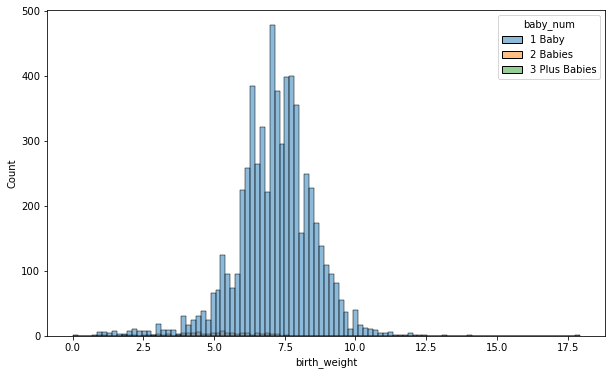

In [195]:
# Using the new column let's plot the histogram again with hue=term
# Set figsize to view it large
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(nsfg, x='birth_weight', hue='baby_num')

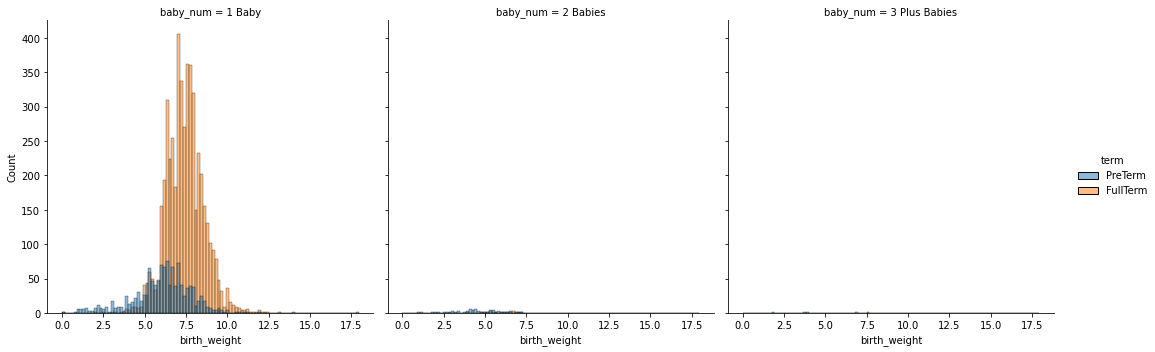

In [200]:
# Using the new column let's plot the histogram again with hue=term
# Set figsize to view it large
sns.displot(nsfg, x='birth_weight', hue='term', col='baby_num')

In [169]:
# Using the ~ we can look at the opposite or full-term stats
nsfg[~preterm].mean()

caseid             65487.092236
birthwgt_lb1           6.951792
birthwgt_oz1           6.718390
prglngth              39.281695
agecon                24.447131
agepreg               25.176034
hpagelb               28.204278
wgt2013_2015       10971.100636
birth_weight           7.372324
preg_length            0.732825
preg_length_wks       38.106886
dtype: float64

In [170]:
preterm_mean = nsfg[preterm].mean()

In [171]:
fullterm_mean = nsfg[~preterm].mean()

In [172]:
terms = pd.concat([preterm_mean, fullterm_mean], axis=1)

In [173]:
terms.columns = ['PreTerm','FullTerm']

In [174]:
terms.head(10)

,PreTerm,FullTerm
caseid,65525.355425,65487.092236
birthwgt_lb1,5.173572,6.951792
birthwgt_oz1,6.544944,6.718390
prglngth,15.810796,39.281695
agecon,24.487571,24.447131
agepreg,24.588078,25.176034
hpagelb,28.140782,28.204278
wgt2013_2015,10441.179532,10971.100636
birth_weight,5.577598,7.372324
preg_length,0.264003,0.732825


In [175]:
terms.drop(['caseid','wgt2013_2015'], axis=0, inplace=True)

In [178]:
terms.head(10)

,PreTerm,FullTerm
birthwgt_lb1,5.173572,6.951792
birthwgt_oz1,6.544944,6.718390
prglngth,15.810796,39.281695
agecon,24.487571,24.447131
agepreg,24.588078,25.176034
hpagelb,28.140782,28.204278
birth_weight,5.577598,7.372324
preg_length,0.264003,0.732825
preg_length_wks,13.728178,38.106886


<AxesSubplot:>

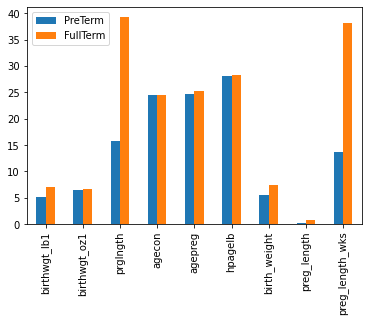

In [179]:
terms.plot(kind='bar')

## Resample the data using resample_rows_weighted